In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from model import *
from transformer import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_root = './data/sanity_datasets/'

# 1: Sanity check [one time series]

## 1.A: Preprocess

In [2]:
'''
Simple sequential datasets:
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
https://datamarket.com/data/set/v8m/births-by-months-18532014#!ds=v8m&display=line
'''
sanity_df = pd.read_csv(
    data_root + 'births-by-months-18532014.csv',
    usecols=[1],
    engine='python',
    skipfooter=3,
    names='y',
    skiprows=[0]
)

In [3]:
# Train, Test split
train_prop = 0.66
num_obs = sanity_df.shape[0]

dataset = sanity_df[:int(train_prop * num_obs)].values
dataset = dataset.astype('float64')

In [4]:
# Normalize
train_min = min(dataset)[0]
train_max = max(dataset)[0]
dataset = (dataset - train_min)/(train_max - train_min)

x_vals = np.expand_dims(dataset[0:-2],axis=0)
y_vals = np.expand_dims(dataset[1:-1],axis=0)

## 1.B: Train

In [5]:
# Params
num_epoch = 400
batch_size = 1
num_feat = 1
lstm_size = 32
fc_hidd_size = 16
lr = 1e-3

M = Model(num_feat=num_feat, lstm_size=lstm_size, fc_hidd_size=fc_hidd_size, lr=lr)
session = tf.Session()
session.run(tf.global_variables_initializer())

history = []
for i_epoch in range(num_epoch):
    loss = M.train_on_batch(
        sequence=x_vals,
        sequence_length=np.array([x_vals.shape[1]]),
        sequence_targets=y_vals,
        target_mask=np.ones_like(y_vals),
        session=session
    )
    history.append(loss)
    if i_epoch % 40 == 0:
        print(loss)

0.1841673468
0.0143124248525
0.0107949790985
0.010288853171
0.00972490545984
0.00897066533603
0.00756413650618
0.0058776157884
0.00430165790403
0.00403298392589


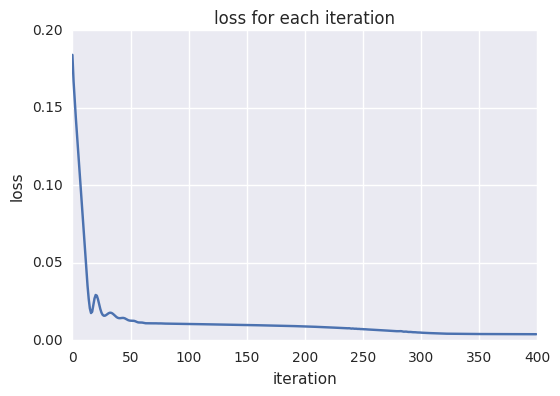

In [6]:
# plot loss
plt.plot(history)
plt.title("loss for each iteration")
plt.xlabel("iteration")
plt.ylabel("loss")

## 1.C: Visualize

In [7]:
test_dataset = sanity_df.values
test_dataset = test_dataset.astype('float32')
test_dataset = (test_dataset - train_min)/(train_max - train_min)

test_x_vals = np.expand_dims(test_dataset[0:-2],axis=0)
test_y_vals = np.expand_dims(test_dataset[1:-1],axis=0)

In [8]:
pred, _ = M.predict(sequence=test_x_vals,
                    sequence_length=np.array([test_x_vals.shape[1]]),
                    session=session)

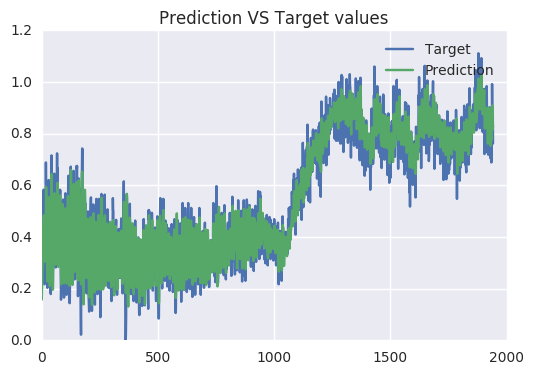

In [9]:
# plot loss
plt.title("Prediction VS Target values")
plt.plot(test_y_vals[0])
plt.plot(pred[0])
plt.legend(['Target', 'Prediction'])